In [1]:
#http://cs231n.github.io/classification/
import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
# Load the raw CIFAR-10 data.
cifar10_dir = '/home/refaay/Work/Assignment1/cifar-10-batches-py/' 
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

x10k_train = X_train[:]
y10k_train = y_train[:]
count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#Refaay
x = 0 # for 10 k
y = 0 # for 50 k
while x < 10000:
    y = y + 1
    #x = x + 1
    if count[y_train[y]] < 1000:
        #print(x)
        count[y_train[y]] = count[y_train[y]] + 1
        x10k_train[x]=X_train[y]
        y10k_train[x]=y_train[y]
        x = x + 1

In [4]:
# 3 crossfolds
exp1x = x10k_train[0:3334]
exp1y = y10k_train[0:3334]
#exp1x = np.copy(x10k_train[0:3333])
#exp1y = np.copy(y10k_train[0:3333])

exp2x = x10k_train[3334:6667]
exp2y = y10k_train[3334:6667]

exp3x = x10k_train[6667:10000]
exp3y = y10k_train[6667:10000]


# As a sanity check, we print out the size of the training and test data.
print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Training 10 k data shape: ', x10k_train.shape)
print ('Training 10 k labels shape: ', y10k_train.shape)
print(count)
print ('exp1 data shape: ', exp1x.shape)
print ('exp1 labels shape: ', exp1y.shape)
print ('exp2 data shape: ', exp2x.shape)
print ('exp2 labels shape: ', exp2y.shape)
print ('exp3 data shape: ', exp3x.shape)
print ('exp3 labels shape: ', exp3y.shape)

#count in each part
count2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
x = 0 
while x < 3334:
    count2[exp1y[x]] = count2[exp1y[x]] + 1
    x = x + 1
print(count2)
count3 = count2
print(count3)
count2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
x = 0 
while x < 3333:
    count2[exp2y[x]] = count2[exp2y[x]] + 1
    x = x + 1
print(count2)
count3 = np.add(count3,count2)
print(count3)
count2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
x = 0 
while x < 3333:
    count2[exp3y[x]] = count2[exp3y[x]] + 1
    x = x + 1
print(count2)
count3 = np.add(count3,count2)
print(count3)

('Training data shape: ', (50000, 32, 32, 3))
('Training labels shape: ', (50000,))
('Test data shape: ', (10000, 32, 32, 3))
('Test labels shape: ', (10000,))
('Training 10 k data shape: ', (50000, 32, 32, 3))
('Training 10 k labels shape: ', (50000,))
[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
('exp1 data shape: ', (3334, 32, 32, 3))
('exp1 labels shape: ', (3334,))
('exp2 data shape: ', (3333, 32, 32, 3))
('exp2 labels shape: ', (3333,))
('exp3 data shape: ', (3333, 32, 32, 3))
('exp3 labels shape: ', (3333,))
[333, 312, 355, 320, 343, 324, 342, 325, 343, 337]
[333, 312, 355, 320, 343, 324, 342, 325, 343, 337]
[337, 301, 334, 338, 348, 321, 345, 336, 330, 343]
[670 613 689 658 691 645 687 661 673 680]
[330, 387, 311, 342, 309, 355, 313, 339, 327, 320]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


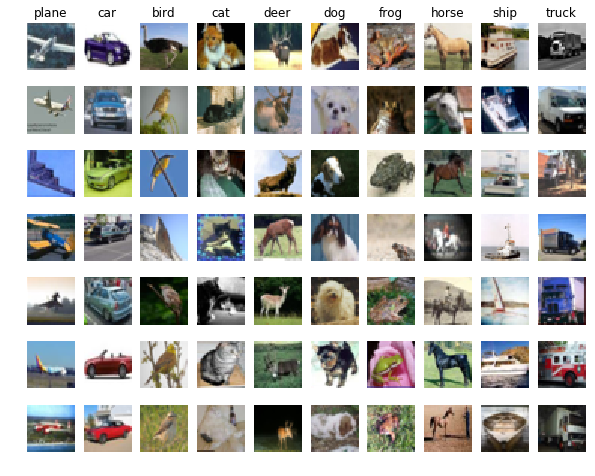

In [5]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [6]:
# Subsample the data for more efficient code execution in this exercise
#num_training = 6666
#mask = range(num_training)
#X_train = X_train[mask]
#y_train = y_train[mask] 

#num_test = 5000
#mask = range(num_test)
#X_test = X_test[mask]
#y_test = y_test[mask]

#EXP 3 -> change
#X_train = np.concatenate((exp1x,exp2x), axis=0) #change
#y_train = np.concatenate((exp1y,exp2y), axis=0) #change
#X_val = exp3x #change
#y_val = exp3y #change
#print ('X_train data shape: ', X_train.shape)
#print ('y_train labels shape: ', y_train.shape)
#print ('X_val data shape: ', X_val.shape)
#print ('y_val labels shape: ', y_val.shape)


In [7]:
# Reshape the image data into rows
#X_train = np.reshape(X_train, (X_train.shape[0], -1))
#X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
#print (X_train.shape, X_val.shape, X_test.shape)

In [8]:
import NearestNeighbor as NN
# Create a NN classifier instance and train it with training data
classifier = NN.NearestNeighbor()
#classifier.train(X_train, y_train)

In [9]:
# Predict the labels of testing data
#y_test_pred = classifier.predict(X_test, 'L2', 9)
# Compute and print the fraction of correctly predicted examples
#num_correct = np.sum(y_test_pred == y_test)

In [10]:
#accuracy = float(num_correct) / 10000
#print ('Got %d / %d correct => accuracy: %f' % (num_correct, 10000, accuracy))

In [17]:
# loop on all k's
accu = []
accumax = []
allkaccu = []
for v in range(1, 21):
    kaccu = []
    
    #EXP 1 -> change
    print('exp1, k = ', v)
    X_train = np.concatenate((exp3x,exp2x), axis=0) #change
    y_train = np.concatenate((exp3y,exp2y), axis=0) #change
    X_val = exp1x #change
    y_val = exp1y #change
    # Reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    classifier.train(X_train, y_train) # train
    y_test_pred = classifier.predict(X_val, 'L2', v)# Predict the labels of testing data
    num_correct = np.sum(y_test_pred == y_val)# Compute and print the fraction of correctly predicted examples
    accuracy = float(num_correct) / 3334
    kaccu.append(accuracy)
    print ('Got %d / %d correct => accuracy1: %f' % (num_correct, 3334, accuracy))
    
    #EXP 2 -> change
    print('exp2, k = ', v)
    X_train = np.concatenate((exp3x,exp1x), axis=0) #change
    y_train = np.concatenate((exp3y,exp1y), axis=0) #change
    X_val = exp2x #change
    y_val = exp2y #change
    # Reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    classifier.train(X_train, y_train) # train
    y_test_pred = classifier.predict(X_val, 'L2', v)# Predict the labels of testing data
    num_correct = np.sum(y_test_pred == y_val)# Compute and print the fraction of correctly predicted examples
    accuracy = float(num_correct) / 3333
    kaccu.append(accuracy)
    print ('Got %d / %d correct => accuracy2: %f' % (num_correct, 3333, accuracy))
    
    #EXP 3 -> change
    print('exp3, k = ', v)
    X_train = np.concatenate((exp1x,exp2x), axis=0) #change
    y_train = np.concatenate((exp1y,exp2y), axis=0) #change
    X_val = exp3x #change
    y_val = exp3y #change
    # Reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    classifier.train(X_train, y_train) # train
    y_test_pred = classifier.predict(X_val, 'L2', v)# Predict the labels of testing data
    num_correct = np.sum(y_test_pred == y_val)# Compute and print the fraction of correctly predicted examples
    accuracy = float(num_correct) / 3333
    kaccu.append(accuracy)
    print ('Got %d / %d correct => accuracy3: %f' % (num_correct, 3333, accuracy))
    accu.append(sum(kaccu) / float(len(kaccu)))
    accumax.append(max(kaccu))
    allkaccu.append(kaccu)

('exp1, k = ', 1)
Got 933 / 3334 correct => accuracy1: 0.279844
('exp2, k = ', 1)
Got 947 / 3333 correct => accuracy2: 0.284128
('exp3, k = ', 1)
Got 910 / 3333 correct => accuracy3: 0.273027
('exp1, k = ', 2)
Got 830 / 3334 correct => accuracy1: 0.248950
('exp2, k = ', 2)
Got 839 / 3333 correct => accuracy2: 0.251725
('exp3, k = ', 2)
Got 777 / 3333 correct => accuracy3: 0.233123
('exp1, k = ', 3)
Got 939 / 3334 correct => accuracy1: 0.281644
('exp2, k = ', 3)
Got 918 / 3333 correct => accuracy2: 0.275428
('exp3, k = ', 3)
Got 840 / 3333 correct => accuracy3: 0.252025
('exp1, k = ', 4)
Got 975 / 3334 correct => accuracy1: 0.292442
('exp2, k = ', 4)
Got 937 / 3333 correct => accuracy2: 0.281128
('exp3, k = ', 4)
Got 865 / 3333 correct => accuracy3: 0.259526
('exp1, k = ', 5)
Got 963 / 3334 correct => accuracy1: 0.288842
('exp2, k = ', 5)
Got 951 / 3333 correct => accuracy2: 0.285329
('exp3, k = ', 5)
Got 877 / 3333 correct => accuracy3: 0.263126
('exp1, k = ', 6)
Got 982 / 3334 correct

('accu av = ', [0.27899991558843945, 0.24459956493549773, 0.2696988055134248, 0.2776985257014004, 0.2790990256794126, 0.2793984857393958, 0.2802986657393994, 0.2797987357224025, 0.2817985757783937, 0.2799982457753874, 0.2801980857953822, 0.2775987856734084, 0.27999863573639905, 0.2810989857234074, 0.2812985257733932, 0.28279840581538657, 0.2824983758123863, 0.2834982058493792, 0.2831979658673726, 0.2803979858093788])
('max accu av', 0.2834982058493792)
('best k', 18)
('accu max = ', [0.28412841284128415, 0.25172517251725174, 0.28164367126574685, 0.2924415116976605, 0.28884223155368927, 0.29454109178164367, 0.29364127174565086, 0.2924415116976605, 0.2960407918416317, 0.2975404919016197, 0.29934013197360526, 0.2897420515896821, 0.29364127174565086, 0.2912417516496701, 0.2960407918416317, 0.29874025194961007, 0.29874025194961007, 0.30143971205758846, 0.30353929214157166, 0.3005398920215957])
('max accumax', 0.30353929214157166)
('best k max', 19)
('allkaccu', [[0.2798440311937612, 0.28412

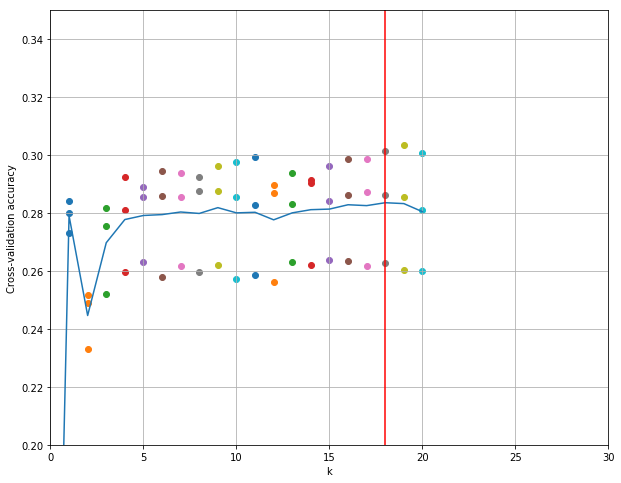

In [19]:
print('accu av = ', accu)
print('max accu av', max(accu))
print('best k', np.argmax(accu)+1)
print('accu max = ', accumax)
print('max accumax', max(accumax))
print('best k max', np.argmax(accumax)+1)
print('allkaccu', allkaccu)

import pylab as pl
pl.plot([0]+accu)
for r in range(0, 20):
    pl.scatter(3*[r+1], allkaccu[r])
    #pl.scatter([2, 2, 2], allkaccu[1])
    #pl.scatter([3, 3, 3], allkaccu[2])
pl.grid()
pl.xlabel('k')#x-axis
pl.ylabel('Cross-validation accuracy')#y-axis
pl.legend(loc='upper left')
pl.xlim(0., 30.)
pl.ylim(0.20, 0.35)
plt.axvline(x=np.argmax(accu)+1, color = 'r')
pl.show()

In [20]:
# loop on all k's
for v in range(21, 41):
    kaccu = []
    
    #EXP 1 -> change
    print('exp1, k = ', v)
    X_train = np.concatenate((exp3x,exp2x), axis=0) #change
    y_train = np.concatenate((exp3y,exp2y), axis=0) #change
    X_val = exp1x #change
    y_val = exp1y #change
    # Reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    classifier.train(X_train, y_train) # train
    y_test_pred = classifier.predict(X_val, 'L2', v)# Predict the labels of testing data
    num_correct = np.sum(y_test_pred == y_val)# Compute and print the fraction of correctly predicted examples
    accuracy = float(num_correct) / 3334
    kaccu.append(accuracy)
    print ('Got %d / %d correct => accuracy1: %f' % (num_correct, 3334, accuracy))
    
    #EXP 2 -> change
    print('exp2, k = ', v)
    X_train = np.concatenate((exp3x,exp1x), axis=0) #change
    y_train = np.concatenate((exp3y,exp1y), axis=0) #change
    X_val = exp2x #change
    y_val = exp2y #change
    # Reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    classifier.train(X_train, y_train) # train
    y_test_pred = classifier.predict(X_val, 'L2', v)# Predict the labels of testing data
    num_correct = np.sum(y_test_pred == y_val)# Compute and print the fraction of correctly predicted examples
    accuracy = float(num_correct) / 3333
    kaccu.append(accuracy)
    print ('Got %d / %d correct => accuracy2: %f' % (num_correct, 3333, accuracy))
    
    #EXP 3 -> change
    print('exp3, k = ', v)
    X_train = np.concatenate((exp1x,exp2x), axis=0) #change
    y_train = np.concatenate((exp1y,exp2y), axis=0) #change
    X_val = exp3x #change
    y_val = exp3y #change
    # Reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    classifier.train(X_train, y_train) # train
    y_test_pred = classifier.predict(X_val, 'L2', v)# Predict the labels of testing data
    num_correct = np.sum(y_test_pred == y_val)# Compute and print the fraction of correctly predicted examples
    accuracy = float(num_correct) / 3333
    kaccu.append(accuracy)
    print ('Got %d / %d correct => accuracy3: %f' % (num_correct, 3333, accuracy))
    accu.append(sum(kaccu) / float(len(kaccu)))
    accumax.append(max(kaccu))
    allkaccu.append(kaccu)

('exp1, k = ', 21)
Got 984 / 3334 correct => accuracy1: 0.295141
('exp2, k = ', 21)
Got 939 / 3333 correct => accuracy2: 0.281728
('exp3, k = ', 21)
Got 870 / 3333 correct => accuracy3: 0.261026
('exp1, k = ', 22)
Got 986 / 3334 correct => accuracy1: 0.295741
('exp2, k = ', 22)
Got 941 / 3333 correct => accuracy2: 0.282328
('exp3, k = ', 22)
Got 859 / 3333 correct => accuracy3: 0.257726
('exp1, k = ', 23)
Got 988 / 3334 correct => accuracy1: 0.296341
('exp2, k = ', 23)
Got 931 / 3333 correct => accuracy2: 0.279328
('exp3, k = ', 23)
Got 857 / 3333 correct => accuracy3: 0.257126
('exp1, k = ', 24)
Got 980 / 3334 correct => accuracy1: 0.293941
('exp2, k = ', 24)
Got 922 / 3333 correct => accuracy2: 0.276628
('exp3, k = ', 24)
Got 861 / 3333 correct => accuracy3: 0.258326
('exp1, k = ', 25)
Got 980 / 3334 correct => accuracy1: 0.293941
('exp2, k = ', 25)
Got 934 / 3333 correct => accuracy2: 0.280228
('exp3, k = ', 25)
Got 861 / 3333 correct => accuracy3: 0.258326
('exp1, k = ', 26)
Got 98

('accu av = ', [0.27899991558843945, 0.24459956493549773, 0.2696988055134248, 0.2776985257014004, 0.2790990256794126, 0.2793984857393958, 0.2802986657393994, 0.2797987357224025, 0.2817985757783937, 0.2799982457753874, 0.2801980857953822, 0.2775987856734084, 0.27999863573639905, 0.2810989857234074, 0.2812985257733932, 0.28279840581538657, 0.2824983758123863, 0.2834982058493792, 0.2831979658673726, 0.2803979858093788, 0.2792984157443939, 0.27859828574339135, 0.2775981257393885, 0.2762982357023945, 0.2774983557143957, 0.27699812572738974, 0.27779847570839866, 0.276098305691397, 0.2747979956963903, 0.27819803576038465, 0.27619792573138535, 0.2777979357623825, 0.2768981757203915, 0.27549821568839544, 0.2756982656873966, 0.2738987756004155, 0.2738985056274074, 0.2727986655894144, 0.2730987855834173, 0.27549848566140356])
('max accu av', 0.2834982058493792)
('best k', 18)
('accu max = ', [0.28412841284128415, 0.25172517251725174, 0.28164367126574685, 0.2924415116976605, 0.28884223155368927, 0

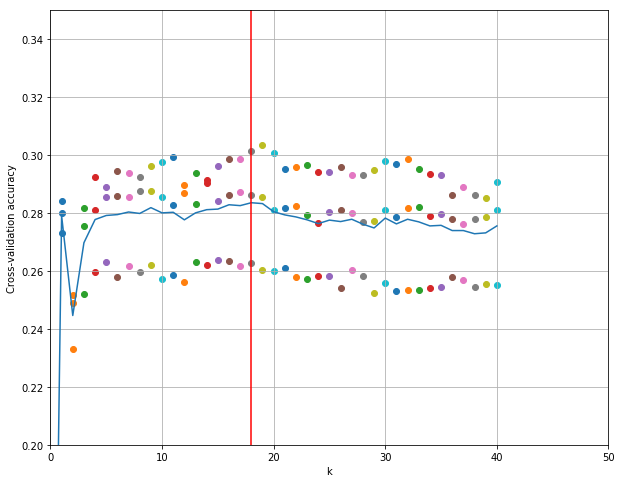

In [21]:
print('accu av = ', accu)
print('max accu av', max(accu))
print('best k', np.argmax(accu)+1)
print('accu max = ', accumax)
print('max accumax', max(accumax))
print('best k max', np.argmax(accumax)+1)
print('allkaccu', allkaccu)

import pylab as pl
pl.plot([0]+accu)
for r in range(0, 40):
    pl.scatter(3*[r+1], allkaccu[r])
    #pl.scatter([2, 2, 2], allkaccu[1])
    #pl.scatter([3, 3, 3], allkaccu[2])
pl.grid()
pl.xlabel('k')#x-axis
pl.ylabel('Cross-validation accuracy')#y-axis
pl.legend(loc='upper left')
pl.xlim(0., 50.)
pl.ylim(0.20, 0.35)
plt.axvline(x=np.argmax(accu)+1, color = 'r')
pl.show()

In [22]:
# loop on all k's
for v in range(41, 61):
    kaccu = []
    
    #EXP 1 -> change
    print('exp1, k = ', v)
    X_train = np.concatenate((exp3x,exp2x), axis=0) #change
    y_train = np.concatenate((exp3y,exp2y), axis=0) #change
    X_val = exp1x #change
    y_val = exp1y #change
    # Reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    classifier.train(X_train, y_train) # train
    y_test_pred = classifier.predict(X_val, 'L2', v)# Predict the labels of testing data
    num_correct = np.sum(y_test_pred == y_val)# Compute and print the fraction of correctly predicted examples
    accuracy = float(num_correct) / 3334
    kaccu.append(accuracy)
    print ('Got %d / %d correct => accuracy1: %f' % (num_correct, 3334, accuracy))
    
    #EXP 2 -> change
    print('exp2, k = ', v)
    X_train = np.concatenate((exp3x,exp1x), axis=0) #change
    y_train = np.concatenate((exp3y,exp1y), axis=0) #change
    X_val = exp2x #change
    y_val = exp2y #change
    # Reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    classifier.train(X_train, y_train) # train
    y_test_pred = classifier.predict(X_val, 'L2', v)# Predict the labels of testing data
    num_correct = np.sum(y_test_pred == y_val)# Compute and print the fraction of correctly predicted examples
    accuracy = float(num_correct) / 3333
    kaccu.append(accuracy)
    print ('Got %d / %d correct => accuracy2: %f' % (num_correct, 3333, accuracy))
    
    #EXP 3 -> change
    print('exp3, k = ', v)
    X_train = np.concatenate((exp1x,exp2x), axis=0) #change
    y_train = np.concatenate((exp1y,exp2y), axis=0) #change
    X_val = exp3x #change
    y_val = exp3y #change
    # Reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    classifier.train(X_train, y_train) # train
    y_test_pred = classifier.predict(X_val, 'L2', v)# Predict the labels of testing data
    num_correct = np.sum(y_test_pred == y_val)# Compute and print the fraction of correctly predicted examples
    accuracy = float(num_correct) / 3333
    kaccu.append(accuracy)
    print ('Got %d / %d correct => accuracy3: %f' % (num_correct, 3333, accuracy))
    accu.append(sum(kaccu) / float(len(kaccu)))
    accumax.append(max(kaccu))
    allkaccu.append(kaccu)

('exp1, k = ', 41)
Got 971 / 3334 correct => accuracy1: 0.291242
('exp2, k = ', 41)
Got 931 / 3333 correct => accuracy2: 0.279328
('exp3, k = ', 41)
Got 855 / 3333 correct => accuracy3: 0.256526
('exp1, k = ', 42)
Got 976 / 3334 correct => accuracy1: 0.292741
('exp2, k = ', 42)
Got 928 / 3333 correct => accuracy2: 0.278428
('exp3, k = ', 42)
Got 849 / 3333 correct => accuracy3: 0.254725
('exp1, k = ', 43)
Got 955 / 3334 correct => accuracy1: 0.286443
('exp2, k = ', 43)
Got 925 / 3333 correct => accuracy2: 0.277528
('exp3, k = ', 43)
Got 848 / 3333 correct => accuracy3: 0.254425
('exp1, k = ', 44)
Got 963 / 3334 correct => accuracy1: 0.288842
('exp2, k = ', 44)
Got 924 / 3333 correct => accuracy2: 0.277228
('exp3, k = ', 44)
Got 852 / 3333 correct => accuracy3: 0.255626
('exp1, k = ', 45)
Got 964 / 3334 correct => accuracy1: 0.289142
('exp2, k = ', 45)
Got 925 / 3333 correct => accuracy2: 0.277528
('exp3, k = ', 45)
Got 848 / 3333 correct => accuracy3: 0.254425
('exp1, k = ', 46)
Got 96

('accu av = ', [0.27899991558843945, 0.24459956493549773, 0.2696988055134248, 0.2776985257014004, 0.2790990256794126, 0.2793984857393958, 0.2802986657393994, 0.2797987357224025, 0.2817985757783937, 0.2799982457753874, 0.2801980857953822, 0.2775987856734084, 0.27999863573639905, 0.2810989857234074, 0.2812985257733932, 0.28279840581538657, 0.2824983758123863, 0.2834982058493792, 0.2831979658673726, 0.2803979858093788, 0.2792984157443939, 0.27859828574339135, 0.2775981257393885, 0.2762982357023945, 0.2774983557143957, 0.27699812572738974, 0.27779847570839866, 0.276098305691397, 0.2747979956963903, 0.27819803576038465, 0.27619792573138535, 0.2777979357623825, 0.2768981757203915, 0.27549821568839544, 0.2756982656873966, 0.2738987756004155, 0.2738985056274074, 0.2727986655894144, 0.2730987855834173, 0.27549848566140356, 0.275698445669402, 0.27529825568039706, 0.27279863559241346, 0.2738985056274074, 0.2736984556284063, 0.2735983256394026, 0.27339839562840507, 0.272198245619403, 0.27209862557

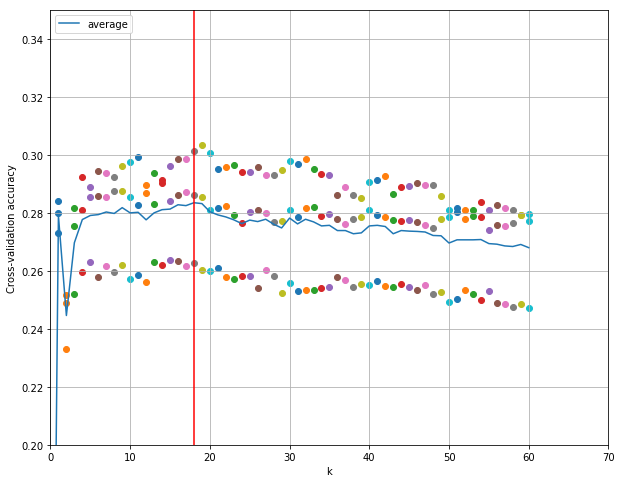

In [24]:
print('accu av = ', accu)
print('max accu av', max(accu))
print('best k', np.argmax(accu)+1)
print('accu max = ', accumax)
print('max accumax', max(accumax))
print('best k max', np.argmax(accumax)+1)
print('allkaccu', allkaccu)

import pylab as pl
pl.plot([0]+accu, label='average')
for r in range(0, 60):
    pl.scatter(3*[r+1], allkaccu[r])
    #pl.scatter([2, 2, 2], allkaccu[1])
    #pl.scatter([3, 3, 3], allkaccu[2])
pl.grid()
pl.xlabel('k')#x-axis
pl.ylabel('Cross-validation accuracy')#y-axis
pl.legend(loc='upper left')
pl.xlim(0., 70.)
pl.ylim(0.20, 0.35)
plt.axvline(x=np.argmax(accu)+1, color = 'r')
pl.show()

('accu av = ', [0.27899991558843945, 0.24459956493549773, 0.2696988055134248, 0.2776985257014004, 0.2790990256794126, 0.2793984857393958, 0.2802986657393994, 0.2797987357224025, 0.2817985757783937, 0.2799982457753874, 0.2801980857953822, 0.2775987856734084, 0.27999863573639905, 0.2810989857234074, 0.2812985257733932, 0.28279840581538657, 0.2824983758123863, 0.2834982058493792, 0.2831979658673726, 0.2803979858093788, 0.2792984157443939, 0.27859828574339135, 0.2775981257393885, 0.2762982357023945, 0.2774983557143957, 0.27699812572738974, 0.27779847570839866, 0.276098305691397, 0.2747979956963903, 0.27819803576038465, 0.27619792573138535, 0.2777979357623825, 0.2768981757203915, 0.27549821568839544, 0.2756982656873966, 0.2738987756004155, 0.2738985056274074, 0.2727986655894144, 0.2730987855834173, 0.27549848566140356, 0.275698445669402, 0.27529825568039706, 0.27279863559241346, 0.2738985056274074, 0.2736984556284063, 0.2735983256394026, 0.27339839562840507, 0.272198245619403, 0.27209862557

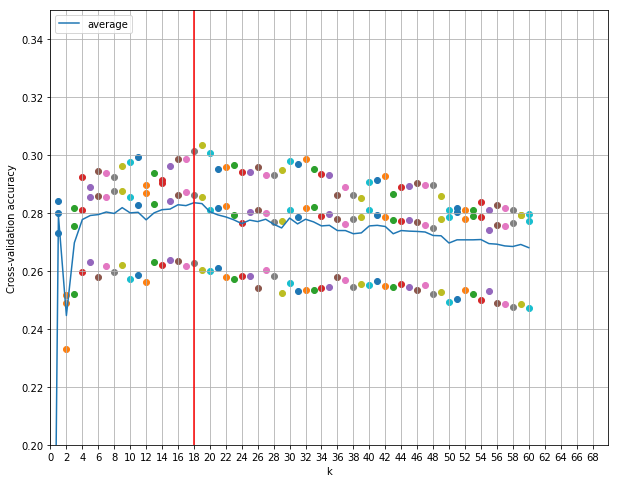

('best order = ', 18)


In [26]:
print('accu av = ', accu)
print('max accu av', max(accu))
print('best k', np.argmax(accu)+1)
print('accu max = ', accumax)
print('max accumax', max(accumax))
print('best k max', np.argmax(accumax)+1)
print('allkaccu', allkaccu)

import pylab as pl
pl.plot([0]+accu, label='average')
for r in range(0, 60):
    pl.scatter(3*[r+1], allkaccu[r])
    #pl.scatter([2, 2, 2], allkaccu[1])
    #pl.scatter([3, 3, 3], allkaccu[2])
pl.grid()
pl.xticks([u*2 for u in range(0,35)])
#pl.yticks([u*25 for u in range(0,11)])
pl.xlabel('k')#x-axis
pl.ylabel('Cross-validation accuracy')#y-axis
pl.legend(loc='upper left')
pl.xlim(0., 70.)
pl.ylim(0.20, 0.35)
plt.axvline(x=np.argmax(accu)+1, color = 'r')
pl.show()
print('best order = ', 18)